### prévision valeur action Air Liquide

## Partie 1 - Préparation des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### prévision valeur action Air Liquide

In [2]:
jour_debut = 3
mois_debut = 1
annee_debut = 2017
mois_fin = 1
jour_fin = 29
annee_fin = 2021

In [3]:
import pandas_datareader.data as web

import datetime
# date de début : année puis mois puis jour
start = datetime.datetime(annee_debut, mois_debut, jour_debut)
# date de fin
end = datetime.datetime(annee_fin, mois_fin, jour_fin)

Airliquide_train = web.DataReader("AI.PA", 'yahoo', start, end)

ModuleNotFoundError: No module named 'pandas_datareader'

In [5]:
jour_debut = 1
mois_debut = 2
annee_debut = 2021
mois_fin = 2
jour_fin = 26
annee_fin = 2021

In [6]:
import pandas_datareader.data as web

import datetime
# date de début : année puis mois puis jour
start = datetime.datetime(annee_debut, mois_debut, jour_debut)
# date de fin
end = datetime.datetime(annee_fin, mois_fin, jour_fin)

Airliquide_test = web.DataReader("AI.PA", 'yahoo', start, end)

In [9]:
Airliquide_train.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,132.949997,131.000000,132.649994,131.399994,897215.0,131.399994
2021-01-26,135.399994,131.500000,131.500000,134.949997,1109386.0,134.949997
2021-01-27,137.399994,133.949997,135.500000,136.500000,1457320.0,136.500000
2021-01-28,137.149994,133.649994,135.100006,136.399994,949552.0,136.399994
2021-01-29,137.399994,133.699997,134.699997,135.000000,1306709.0,135.000000


In [7]:
Airliquide_test.head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-01,137.199997,135.649994,136.500000,136.100006,714800,136.100006
2021-02-02,137.850006,135.800003,136.500000,135.850006,1022688,135.850006
2021-02-03,137.500000,136.050003,136.449997,136.500000,560372,136.500000
2021-02-04,137.550003,135.600006,136.300003,136.350006,790280,136.350006
2021-02-05,136.899994,135.550003,136.199997,136.250000,698441,136.250000
2021-02-08,137.399994,135.949997,136.800003,136.800003,621520,136.800003
2021-02-09,137.500000,135.949997,136.500000,137.500000,640339,137.500000
2021-02-10,138.000000,133.899994,138.000000,134.750000,1075420,134.750000
2021-02-11,135.600006,134.449997,135.350006,134.949997,717594,134.949997


In [10]:
Airliquide_train.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,132.949997,131.000000,132.649994,131.399994,897215.0,131.399994
2021-01-26,135.399994,131.500000,131.500000,134.949997,1109386.0,134.949997
2021-01-27,137.399994,133.949997,135.500000,136.500000,1457320.0,136.500000
2021-01-28,137.149994,133.649994,135.100006,136.399994,949552.0,136.399994
2021-01-29,137.399994,133.699997,134.699997,135.000000,1306709.0,135.000000


In [7]:
Airliquide_train  = Airliquide_train.rename_axis('Date').reset_index()

In [8]:
Airliquide_test  = Airliquide_test.rename_axis('Date').reset_index()

In [9]:
dataset_train = Airliquide_train

In [10]:
dataset_test = Airliquide_test

In [11]:
# conversion de la feature Close en values pour keras 
train = dataset_train.iloc[:, 4:5]
training_set = dataset_train.iloc[:, 4:5].values

In [12]:
# conversion de la feature Close en values pour keras 
test = dataset_test.iloc[:, 4:5]
testing_set = dataset_test.iloc[:, 4:5].values

In [17]:
train.head()

,Close
0,87.314049
1,87.231407
2,87.272728
3,87.644630
4,86.528923


In [13]:
training_set.shape

(1042, 1)

In [14]:
len(training_set)

1042

In [15]:
len(testing_set)

20

In [13]:
# Mise à l'échelle des data dans l'interval 0,1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
# Creation du train set pour une prévision de la valeur de l'action au jour j 
# basée sur les 60 jours précédents (3 mois) 
X_train = []
y_train = []
# Dans X_train, les 60 jours précédents le jour i
# Dans y_train, le jour i
# training_set_scaled étant une array, il faut ajouter le numéro de colonne, soit 0 
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
# transformation des listes X_train et y_train en array avec numpy    
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
# Redimensionnement en 3 dimensions nécessaire pour la modèlisation
# cf doc Keras dans RNN et output shape
# batchsize : nbre de lignes du dataset soit X_train.shape[0)
# timestep : nbre de colonnes du dataset, soit X_train.shape[1], ici = 60 
# input_dim = nbre de variables explicatives, ici 1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Partie 2 - RNN

In [16]:
# Import libraries Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [17]:
# Initialisation RNN avec Sequential()
regressor = Sequential()

In [18]:
# première couche LSTM et régularisation Dropout
# units = nbre de neurones de la couche
# return_sequences=True car dans le réseau on empile plusieurs couches LSTM
# dans input_shape, indication du train set avec le nbre de time steps (60) et le nbre de feature, ici 1 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

In [19]:
# deuxième couche LSTM layer et régularisation Dropout identique couche précédente
# entrées de cette couche = sortie de la couche précédente : input_shape inutile 
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))
# troisième couche LSTM layer et régularisation Dropout 
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))
# quatrième couche LSTM layer et régularisation Dropout 
# dernière couche LSTM : return_sequence = False (valeur par défaut)
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.1))

In [20]:
# couche de sortie 1 seul neurone
regressor.add(Dense(units = 1))

In [21]:
# Compilation RNN
# optimizer : cf doc Keras adam (ou RMSprop recommandé pour les RNN)
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)              

In [31]:
# Fit le RNN sur train set
# choisir les valeurs des hyperparamètres
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
982/982 [==============================] - 11s 11ms/step - loss: 0.0018
Epoch 2/50
982/982 [==============================] - 11s 11ms/step - loss: 0.0021
Epoch 3/50
982/982 [==============================] - 12s 12ms/step - loss: 0.0026
Epoch 4/50
982/982 [==============================] - 12s 13ms/step - loss: 0.0022
Epoch 5/50
982/982 [==============================] - 13s 13ms/step - loss: 0.0019
Epoch 6/50
982/982 [==============================] - 13s 13ms/step - loss: 0.0023
Epoch 7/50
982/982 [==============================] - 14s 14ms/step - loss: 0.0023
Epoch 8/50
982/982 [==============================] - 14s 14ms/step - loss: 0.0019
Epoch 9/50
982/982 [==============================] - 14s 14ms/step - loss: 0.0018
Epoch 10/50
982/982 [==============================] - 14s 14ms/step - loss: 0.0016
Epoch 11/50
982/982 [==============================] - 14s 14ms/step - loss: 0.0017
Epoch 12/50
982/982 [==============================] - 14s 15ms/step - loss: 0.0019
E

## Partie 3 - Prédictions

In [32]:
# récupération des valeurs réelles (valeur de cloture) des actions dans le test set (20 valeurs de février)
real_stock_price = testing_set

In [33]:
# prédictions du feature Close 
# concaténation des datasets train et test d'origine, au niveau des lignes avec axis = 0 (l'un au dessus de l'autre)
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
# dans inputs on met les 60 jours précédents le jour à prédire et ceci pour tous les jours du mois à prédire :
# transformation en array pour keras
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# redimensionnement nécessaire du dataset 
inputs = inputs.reshape(-1,1)
# utilisation du meme objet sc utilisée pour l'entrainement
inputs = sc.transform(inputs)

# alimentation du X_test avec les valeurs inputs correspondantes 
X_test = []
# range de 60 à 80 puisque test set de 20 lignes
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
# transformation en array    
X_test = np.array(X_test)
# redimensionnement en 3 dimensions avec reshape pour obtenir un X_test avec 20 lignes, 60 colonnes et 1 en troisième dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# prévisions avec fonction predict sur le modèle regressor 
predicted_stock_price = regressor.predict(X_test)
# prévisions sur l'échelle d'orignie avec transformation inverse
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [34]:
from sklearn.metrics import r2_score
r2_score(real_stock_price, predicted_stock_price)

0.8191232000572304

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real_stock_price, predicted_stock_price)

2.059739379899111

In [36]:
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

1.435179215254705

In [37]:
# moyenne valeur action sur test set pour comparaison avec rmse
dataset_test['Close'].mean()

133.41500091552734

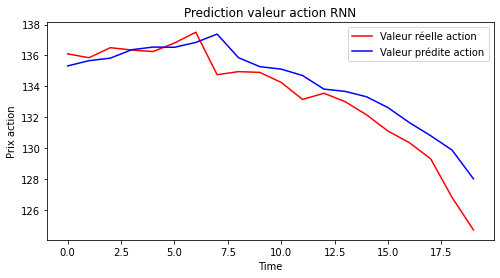

In [38]:
# Visu résultats vraies valeurs versus prévisions avec 50 époques
plt.figure(figsize=(8,4))
plt.plot(real_stock_price, color = 'red', label = 'Valeur réelle action')
plt.plot(predicted_stock_price, color = 'blue', label = 'Valeur prédite action')
plt.title('Prediction valeur action RNN')
plt.xlabel('Time')
plt.ylabel('Prix action')
plt.legend()
plt.show()